# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import os
import tensorflow as tf
import cv2
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'
validation_file= 'valid.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)    
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

#validation set
from sklearn.model_selection import train_test_split
print("Updated Image Shape: {}".format(X_train[0].shape))



Updated Image Shape: (32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
#http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html
from sklearn.model_selection import train_test_split  
from random import randrange

def showInfoDataset():
    # TODO: Number of training examples
    n_train = len(X_train)

    # TODO: Number of testing examples.
    n_test = len(X_test)

    # TODO: What's the shape of an traffic sign image?
    image_shape = X_train[1].shape

    # TODO: How many unique classes/labels there are in the dataset.
    n_classes = np.unique(y_train).shape[0]


    print("Number of training examples =", n_train)
    print("Number of testing examples =", n_test)
    print("Number of validation examples =", len(X_valid))

    print("Image data shape =", image_shape)
    print("Number of classes =", n_classes)

showInfoDataset()

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

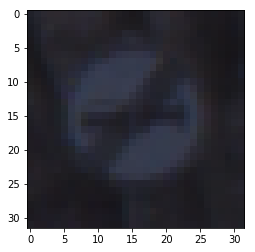

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm # 
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()
plt.imshow(image)


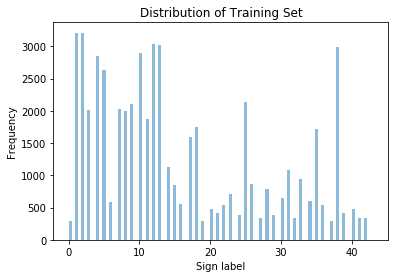

In [14]:
bins = np.linspace(0, len(np.bincount(y_train)), 100)
plt.hist(y_train, bins, alpha=0.5)
plt.title('Distribution of Training Set')
plt.xlabel("Sign label")
plt.ylabel("Frequency")


From the histogram we can observe that there are some classes with few example, therefore is poor balanced


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

### QUESTION 1. Describe how, and identify where in your code, you preprocessed the image data. What tecniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc.

The code for this step is contained in the code cell bellow

As a first step, I've decided to convert the images to grayscale because it improves the performance, however I'm not sure about how much improves with respect to the color images in regard to accuracy. But this solution seems to work well in terms of performance and accuracy (not so well, but is acceptable).

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#As i describe before I prefere to preprocess the data before
from sklearn.utils import shuffle

X_train=X_train[:, :, :, 0]*0.299+X_train[:, :, :, 1]*0.587+X_train[:, :, :, 2]*0.114
X_valid=X_valid[:, :, :, 0]*0.299+X_valid[:, :, :, 1]*0.587+X_valid[:, :, :, 2]*0.114
X_test=X_test[:, :, :, 0]*0.299+X_test[:, :, :, 1]*0.587+X_test[:, :, :, 2]*0.114

X_train.shape = (len(X_train), 32, 32, 1)
X_valid.shape = (len(X_valid), 32, 32, 1)
X_test.shape = (len(X_test), 32, 32, 1)


### QUESTION 2. Describe how, and identify where in your code, you set up training, validation and testing data. How much data was in each set? Explain what techniques were used to split the data into these sets. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, identify where in your code, and provide example images of the additional data)

The code for splitting the data into training and validation sets is contained below.

To cross validate my model, I randomly split the training data into a training set and validation set. I've also generate additional data, I have applied a rotation of a value between 0 and 5 grades to all the training set. Both approaches allow an improvement in the prediction accuracy, because the dataset is not sufficient to train properly the network. Finally the dataset is shuffled.

I would like to explore in the future another approaches, for instance, augmentate the dataset changing the bright of the images as I have seen in the Slack chat. 
This is my final training,validation and test set:

- Number of training examples = 55678
- Number of testing examples = 12630
- Number of validation examples = 18330


(32, 32, 1)
Number of training examples = 55678
Number of testing examples = 12630
Number of validation examples = 18330
Image data shape = (32, 32, 1)
Number of classes = 43


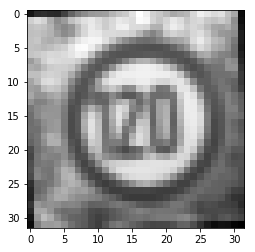

In [6]:
def rotateImage(image, angle):
    rows,cols = image.squeeze().shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst = cv2.warpAffine(image,M,(cols,rows))
    return dst

def increaseTrainSize(X_train,y_train):
    X_new_train = X_train
    Y_new_train = y_train
    for i in range(0,len(X_new_train)):
        temp = rotateImage(X_train[i],randrange(4))
        temp.shape=(32, 32, 1)
        X_new_train[i] = temp
        Y_new_train[i] = y_train[i]
    index = random.randint(0, len(X_train))
    image = X_new_train[index].squeeze()
    plt.imshow(image, cmap = cm.Greys_r)
    X_train = np.concatenate((X_train,X_new_train))
    print(X_train[len(X_new_train)].shape)
    y_train = np.concatenate((y_train,Y_new_train))
    return X_train,y_train

#increase the train size
X_train,y_train=increaseTrainSize(X_train,y_train)
X_train,X_validation_split,y_train,y_validation_split=train_test_split(X_train,y_train,test_size=0.2,random_state=0)
X_valid = np.concatenate((X_valid,X_validation_split))
y_valid = np.concatenate((y_valid,y_validation_split))

showInfoDataset()

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X_valid, y_valid = shuffle(X_valid, y_valid)

### Model Architecture

### QUESTION 3. Describe, and identify where in your code, what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

The code for my final model is located in the cell below

I've used the LeNet implementation of the course. LeNet is good for the digit classification, therefore my objective was re-use the work done and enrich the net. So, I've increased the number of filters in order to recognize/detect more low level features.

My final model consisted of the following layers:

    Layer 	             Description
    Input 	            32x32x1 RGB image
    Convolution 3x3 	 1x1 stride, valid padding, outputs 28x28x6
    RELU 	
    Max pooling 	     2x2 stride, outputs 14x14x6
    Convolution 3x3 	 1x1 stride, valid padding, outputs 10x10x64
    RELU 	
    Max pooling 	     Input = 10x10x24. Output = 5x5x16.
    Fully connection	 Input = 1600. Output = 120
    Relu 	       
    Fully connection	 Input = 120. Output = 84.
    Relu 	       
    Fully connection	 Input=84, Output=43.
 
 I've also changed the sigma in order to reduce the prior impact (i.e, how starts the network to calculate the output) 

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x):   
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.05
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x24. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 800.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 1600. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 192), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(192))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(192, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### QUESTION 4. Describe how, and identify where in your code, you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

The code for training the model is located in the eigth cell of the ipython notebook.

To train the model, I used the Adam Optimzer an "algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments" (https://arxiv.org/abs/1412.6980v8)

The batch size is 128 (remember the memory constraints), the number of epochs is 20 (seems to be enough). The learning reat is 0.001

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.001

logits = LeNet(x)
print(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Tensor("add_4:0", shape=(?, 43), dtype=float32)


## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Predict the Sign Type for Each Image

In [9]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Analyze Performance

In [10]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
EPOCHS=20
BATCH_SIZE=128
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
 
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet.ckpt')
    print("Model saved")

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Training...

EPOCH 1 ...
Validation Accuracy = 0.930

EPOCH 2 ...
Validation Accuracy = 0.959

EPOCH 3 ...
Validation Accuracy = 0.959

EPOCH 4 ...
Validation Accuracy = 0.960

EPOCH 5 ...
Validation Accuracy = 0.980

EPOCH 6 ...
Validation Accuracy = 0.977

EPOCH 7 ...
Validation Accuracy = 0.978

EPOCH 8 ...
Validation Accuracy = 0.976

EPOCH 9 ...
Validation Accuracy = 0.974

EPOCH 10 ...
Validation Accuracy = 0.982

EPOCH 11 ...
Validation Accuracy = 0.985

EPOCH 12 ...
Validation Accuracy = 0.980

EPOCH 13 ...
Validation Accuracy = 0.974

EPOCH 14 ...
Validation Accuracy = 0.974

EPOCH 15 ...
Validation Accuracy = 0.983

EPOCH 16 ...
Validation Accuracy = 0.977

EPOCH 17 ...
Validation Accuracy = 0.983

EPOCH 18 ...
Validation Accuracy = 0.979

EPOCH 19 ...
Validation Accuracy = 0.982

EPOCH 20 ...
Validation Accuracy = 0.988

Model saved
Test Accuracy = 0.937


In [11]:
# testing the model
with tf.Session() as sess:

    # restore saved session with highest validation accuracy
    saver.restore(sess, './lenet.ckpt')
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    validation_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))

Test Accuracy = 0.937
Train Accuracy = 0.999
Validation Accuracy = 0.988


### QUESTION 5. Describe the approach taken for finding a solution. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

The code for calculating the accuracy of the model is located above

My final model results were:

    Test Accuracy = 0.937
    Train Accuracy = 0.999
    Validation Accuracy = 0.988  

If a well known architecture was chosen:

    What architecture was chosen? 
    LeNet
    
    Why did you believe it would be relevant to the traffic sign application?
    As I mentioned before, LeNet works well for the digit classification so I've decided to re-use the network model modifying some parameters in order to recognize more low level features, as the digits the traffic signs are fixed images that could be works with this net model.
   

### QUESTION 6. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Here are five German traffic signs that I found on the web:

[//]: # (Image References)
[image1]: ./german_signals/1.png
[image2]: ./german_signals/2.png
[image3]: ./german_signals/3.png
[image4]: ./german_signals/4.png
[image5]: ./german_signals/5.png

![alt text][image1] 
![alt text][image2]
![alt text][image3]
![alt text][image4]
![alt text][image5]


- The first image might be difficult to classify because it has some noise
- The second image might be difficult to classify because it has on top a design  
- The third image will be classified correctly
- The fourth image might not be classified correctly because it's not in the dataset 
- The fifth image might not be classified correctly because it's not in the dataset



### QUESTION 7. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. Identify where in your code predictions were made. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).


Image: 1 | Label Objective -> 15 | Label Predicted -> 13
Image: 2 | Label Objective -> 17 | Label Predicted -> 17
Image: 3 | Label Objective -> 17 | Label Predicted -> 17
Image: 4 | Label Objective -> 2 | Label Predicted -> 2
Image: 5 | Label Objective -> 42 | Label Predicted -> 13
Test Accuracy = 0.600


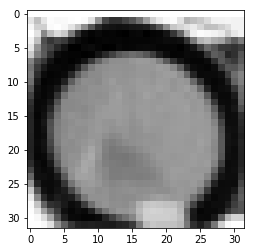

In [12]:
with tf.Session() as sess:

    saver  = tf.train.Saver()
    saver.restore(sess, './lenet.ckpt')

    input_dir="german_signals/"
    i=0
    images=[cv2.cvtColor(cv2.imread(input_dir+"/"+image_name), cv2.COLOR_BGR2RGB) for image_name in os.listdir(input_dir)]
    images=np.array(images)[:, :, :, 0]*0.299+np.array(images)[:, :, :, 1]*0.587+np.array(images)[:, :, :, 2]*0.114
    images.shape = (len(images), 32, 32, 1)
    labels=[15,17,17,2,42]
    plt.imshow(images[0].squeeze(), cmap = cm.Greys_r)

    labels_predicted = np.argmax(np.array(sess.run(logits, feed_dict={x: images, tf.placeholder(tf.float32): 1.})), axis=1)
    for i in range(0,len(labels_predicted)):
        print('Image: {} | Label Objective -> {} | Label Predicted -> {}'.format(i+1, labels[i], labels_predicted[i]))
    
    test_signal = evaluate(images, labels)
    print("Test Accuracy = {:.3f}".format(test_signal))

The accuracy is 60%
Here are the results and thoughts about the prediction:

    Image 1 | Wrong, the image has noise, the prediction is understandable
    Image 2 | Correct, the prediction is as expected
    Image 3 | Correct, the prediction is as expected
    Image 4 | Correct, this image was not in the dataset, the prediction is a very similar speed limit sign
    Image 5 | Correct, this image was not in the dataset


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### QUESTION 8. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction and identify where in your code softmax probabilities were outputted. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

In [13]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, './lenet.ckpt')
    top  = sess.run(tf.nn.top_k(logits, 5), feed_dict={x: images, tf.placeholder(tf.float32): 1.})
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: images, tf.placeholder(tf.float32): 1.})
    for i in range(0,len(images)):
        print('Image {} top probabilities:'.format(i+1))
        for j in range(0,len(images)):
            print('\t Prob: {:02f} -> prediction label: {:02d}'.format(prob[i][top[1][i][j]],top[1][i][j]))

Image 1 top probabilities:
	 Prob: 0.999080 -> prediction label: 13
	 Prob: 0.000816 -> prediction label: 14
	 Prob: 0.000066 -> prediction label: 12
	 Prob: 0.000025 -> prediction label: 38
	 Prob: 0.000013 -> prediction label: 35
Image 2 top probabilities:
	 Prob: 0.748489 -> prediction label: 17
	 Prob: 0.174247 -> prediction label: 09
	 Prob: 0.067404 -> prediction label: 13
	 Prob: 0.003601 -> prediction label: 15
	 Prob: 0.003421 -> prediction label: 12
Image 3 top probabilities:
	 Prob: 1.000000 -> prediction label: 17
	 Prob: 0.000000 -> prediction label: 14
	 Prob: 0.000000 -> prediction label: 03
	 Prob: 0.000000 -> prediction label: 12
	 Prob: 0.000000 -> prediction label: 34
Image 4 top probabilities:
	 Prob: 1.000000 -> prediction label: 02
	 Prob: 0.000000 -> prediction label: 25
	 Prob: 0.000000 -> prediction label: 04
	 Prob: 0.000000 -> prediction label: 12
	 Prob: 0.000000 -> prediction label: 11
Image 5 top probabilities:
	 Prob: 0.999533 -> prediction label: 13
	 Pr

The code for making predictions is above. The output is as expected.

For the first image, the model is relatively sure that this is a stop sign (probability of 0.6), and the image does contain a stop sign. 

For the second image the prediction is relatively sure that this is a stop sign (probability of 0.74)

For the third image the prediction is completely sure that the image is a stop sign.

The fourth image was not in the dataset the prediction is a very similar speed limit sign

For the fifth image I can't conclude any clear conclusion :S (is maybe the color features important here? the YUV approach is maybe not totally correct in this case, that's clear).